# PAP2 V255: Röntgenspektrometer

In [68]:
#Importieren von allen benötigten Modulen

#%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import io #Für ersetzen der Komma durch Punkte
from scipy.stats import chi2 #Für Fitgüte

Aufgabe 1:


a) Extrapolieren sie den einigermaßen geraden Anstieg am kurzwelligen Ende bis zum Untergrund. Versehen Sie die betreffenden Punkte mit statisti- schen Fehlern. Bestimmen Sie so die Grenzwellenla ̈nge des Bremsspek- trums von 35 kV und daraus die Plank’sche Konstante h. Berechnen Sie aus der Stelle des Beginns des Spektrums, ab welchen Winkel das Spek- trum zweiter Ordnung einsetzt.

b) Tragen Sie die Za ̈hlrate als Funktion des Winkels β fu ̈r die vier Linien auf und bestimmen sie die Wellenla ̈nge von Kα und Kβ aus den Messungen in beiden Ordnungen. Bestimmen Sie fu ̈r Kα in erster Ordnung die Halb- wertsbreite (Breite der Linie in halber Ho ̈he).
Dichte Molekulargewicht Netzebenenabstand

c) Bestimmen Sie durch Extrapolation die Einsatzspannung, d.h. die Span- nung, oberhalb der es Quanten gibt, deren Wellenla ̈nge zu β = 7,5◦ geho ̈rt. Berechnen Sie aus diesem Wert wieder h. Theoretisch ist diese sog. Iso- chromatenmethode, die hier zur h Bestimmung benutzt wird, der Extrapo- lation des kurzwelligen Endes des Spektrums in Aufgabe 2a) a ̈quivalent. Die Spektrumsextrapolation ist aber in der Praxis ungenauer, da dort Messpunkte unterschiedlicher Wellenla ̈nge benutzt werden, die individuell z.B. auf Eigenabsorption in der Anode, dem Ro ̈hrenfenster usw. sowie auf das unterschiedliche Reflexionsvermo ̈gen des Kristalls korrigiert werden mu ̈ssten.

Aufgabe 2: 


Ermitteln Sie aus dem Spektrum die Lage der Kα und Kβ-Linien und berechnen Sie mit den in 1b) gewonnenen Wellenla ̈ngen fu ̈r Kα und Kβ die Gitterkonstante von NaCl sowie die Avogadro Zahl.



(3, 22, 0, 3000)

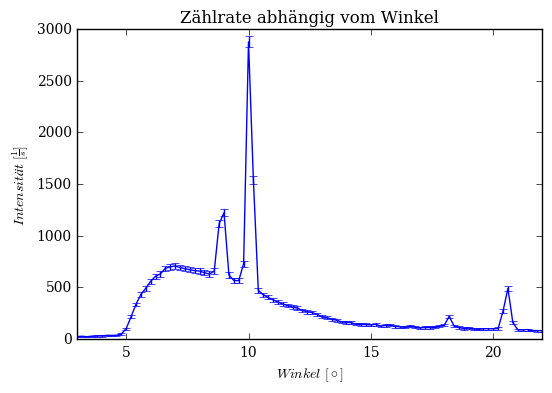

In [69]:
#Einlesen der Daten aus LiF.txt für LiF Kristall mit Fehler
daten = open('LiF.txt').read().replace(',','.')
angle, intensity = np.loadtxt(io.StringIO(daten), unpack=True)
#print (angle, intensity)
dintensity=np.sqrt(intensity)

plt.rcParams["font.family"]='serif'
plt.errorbar(angle, intensity, yerr=dintensity)
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Zählrate abhängig vom Winkel')
plt.axis((3, 22, 0, 3000))

popt und perr des ersten Fits y = ax
[ 22.7] [ 1.47082743]
popt und perr des zweiten Fits y = b+c*x
[-2676.23999569   555.79999919] [ 98.68480906  18.60322576]
Untergrund= 22.7 ± 1.47082742844
Fitgerade = b + c * x
b= -2676.23999569 ± 98.6848090553
c= 555.799999187 ± 18.6032257587
chisq= 0.449685478994
chisq_red= 0.224842739497
Fitwahrscheinlichkeit= 80.0 %


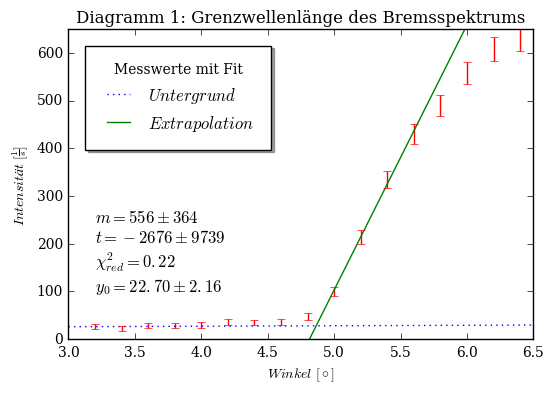

In [70]:
#Aufgabe 1a: Extrapolieren

#Winkelstücke definieren für spätere Fits
ang1=angle[1:5]
int1=intensity[1:5]

ang2=angle[10:14]
int2=intensity[10:14]
dint2=dintensity[10:14]

#Zwei Fitfunktionen, verschiedene Geraden
def linear1(x,a):
    return a+x
popt, pcov = curve_fit(linear1, ang1, int1, p0=[1])
perr = np.sqrt(np.diag(pcov))

def linear2(x,b,c):
    return b+c*x
popt2,pcov2=curve_fit(linear2, ang2, int2)
perr2 = np.sqrt(np.diag(pcov2))


#Güte des Fits
chisq=np.sum((linear2(ang2,*popt2)-int2)**2/dint2**2)
dof=2
chisq_red=chisq/dof
prob=round(1-chi2.cdf(chisq,dof),2)*100

x=np.linspace(3,7,20)
y=np.linspace(4.7,6,20)

plt.plot(x,linear1(x,*popt),label="$Untergrund$",linestyle=':')
plt.plot(y,linear2(y,*popt2), label="$Extrapolation$")
plt.errorbar(angle[1:20], intensity[1:20],dintensity[1:20], linestyle='None')
plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 1: Grenzwellenlänge des Bremsspektrums')
plt.rcParams["font.family"]='serif'
plt.legend(title='Messwerte mit Fit', borderpad=1, borderaxespad=1, loc='upper left', shadow='true')
plt.axis((3, 6.5, 0, 650))
plt.text(3.2,100,"$m=556\pm364$\n$t=-2676\pm9739$\n$\chi_{red}^{2}=0.22$\n$y_{0}=22.70\pm2.16$", fontsize=12)

print('popt und perr des ersten Fits y = ax')
print(popt, perr)
print('popt und perr des zweiten Fits y = b+c*x')
print(popt2, perr2)
print('Untergrund=',popt[0],'±',perr[0])
print('Fitgerade = b + c * x')
print('b=',popt2[0],'±',perr2[0])
print('c=',popt2[1],'±',perr2[1])
print('chisq=',chisq)
print('chisq_red=',chisq_red)
print('Fitwahrscheinlichkeit=',prob,'%')

#plt.savefig('v255_1.pdf',format='pdf')

[  2.39569960e+02   8.91089309e+00   2.31831009e-01   6.01293048e+02]
[  7.26070621e+02   1.00479382e+01   2.22138060e-01   5.06165465e+02]
Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)
 
K_beta erster Ordnung:
Ab1= 239.569959721 ± 29.1628640541
mub1= 8.91089308661 ± 0.0101981159632
sigb1= 0.231831009476 ± 0.0517501564411
Ub1= 601.293047541 ± 28.912224816
chisqb1= 5.76947165116
chisqb1_red= 1.92315721705
Fitwahrscheinlichkeitb1= 12.0 %
 
K_alpha erster Ordnung:
Aa1= 726.070620591 ± 63.5801650016
mua1= 10.0479381625 ± 0.00983485221367
siga1= 0.222138059873 ± 0.0198139901523
Ua1= 506.165465007 ± 59.4362752718
chisqa1= 11.9638289764
chisqa1_red= 5.9819144882
Fitwahrscheinlichkeita1= 1.0 %


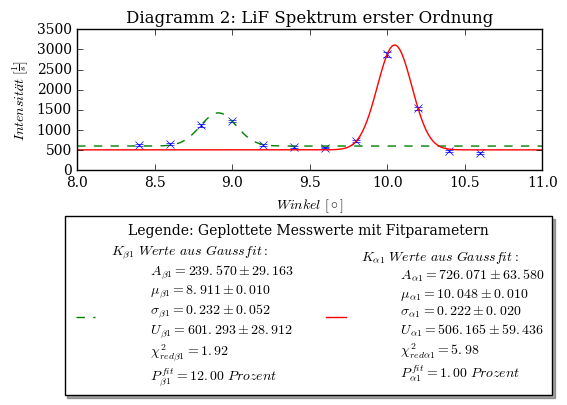

In [71]:
#Aufgabe 2b: Spektrum erster Ordnung von LiF
#Zählrate als Funktion des Winkels, bestimmen der Wellenlängen von Ka und Kb

#Fitfunktion für Peaks
def gauss(x, A, mu, sig,U):
    return U+(A/(sig*np.sqrt(np.pi/2)))*np.exp(-2*((x-mu)/sig)**2)

#Auswählen des Spektrums erster Ordnung
ang3=angle[27:39]
int3=intensity[27:39]
dint3=dintensity[27:39]

#Gausskurven an die Peaks fitten
poptb1, pcovb1=curve_fit(gauss,ang3[0:6], int3[0:6], p0=[240,9,0.23,601], sigma=dint3[0:6])
popta1, pcova1=curve_fit(gauss,ang3[6:11], int3[6:11], p0=[726,10,0.2,500], sigma=dint3[6:11])
perrb1 = np.sqrt(np.diag(pcovb1))
perra1 = np.sqrt(np.diag(pcova1))
x3=np.linspace(8,11,200)

#Güte der Fits bestimmen:
#Güte Kbeta Linie
chisqb1=np.sum((gauss(ang3[0:6],*poptb1)-int3[0:6])**2/dint3[0:6]**2)
dofb1=3
chisqb1_red=chisqb1/dofb1
probb1=round(1-chi2.cdf(chisqb1,dofb1),2)*100

#Güte Kalpha Linie
chisqa1=np.sum((gauss(ang3[6:11],*popta1)-int3[6:11])**2/dint3[6:11]**2)
dofa1=2
chisqa1_red=chisqa1/dofa1
proba1=round(1-chi2.cdf(chisqa1,dofb1),2)*100


#Plotten der Punkte und des Fits

plt.subplot(211)
plt.errorbar(ang3, int3,yerr=dint3, linestyle='none', marker='x')
plt.plot(x3, gauss(x3, *poptb1), linestyle='--', 
         label='$K_{\\beta1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\beta1}=%.3f\pm%.3f$ \n\
         $\\mu_{\\beta1}=%.3f\pm%.3f$ \n\
         $\\sigma_{\\beta1}=%.3f\pm%.3f$ \n\
         $U_{\\beta1}=%.3f\pm%.3f$ \n\
         $\\chi_{red\\beta1}^{2}=%.2f$ \n\
         $P_{\\beta1}^{fit}=%.2f\ Prozent$' 
         %(poptb1[0], perrb1[0], poptb1[1], perrb1[1], poptb1[2], perrb1[2], poptb1[3], perrb1[3], chisqb1_red, probb1)) 

plt.plot(x3, gauss(x3, *popta1), 
         label='$K_{\\alpha1}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\alpha1}=%.3f\pm%.3f$ \n\
         $\\mu_{\\alpha1}=%.3f\pm%.3f$ \n\
         $\\sigma_{\\alpha1}=%.3f\pm%.3f$ \n\
         $U_{\\alpha1}=%.3f\pm%.3f$ \n\
         $\\chi_{red\\alpha1}^{2}=%.2f$ \n\
         $P_{\\alpha1}^{fit}=%.2f\ Prozent$' 
         %(popta1[0], perra1[0], popta1[1], perra1[1], popta1[2], perra1[2], popta1[3], perra1[3], chisqa1_red, proba1)) 


plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 2: LiF Spektrum erster Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende: Geplottete Messwerte mit Fitparametern', borderpad=0.5, borderaxespad=3.3, shadow='true', fontsize=10, bbox_to_anchor=(1.12, 0), loc='upper right', ncol=2)
#plt.axis((3, 6.2, 0, 600))



#Ausgeben der rohen Werte
print (poptb1)
print (popta1)
print('Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print(' ')
print('K_beta erster Ordnung:')
print('Ab1=',poptb1[0],'±',perrb1[0])
print('mub1=',poptb1[1],'±',perrb1[1])
print('sigb1=',poptb1[2],'±',perrb1[2])
print('Ub1=',poptb1[3],'±',perrb1[3])
print('chisqb1=',chisqb1)
print('chisqb1_red=',chisqb1_red)
print('Fitwahrscheinlichkeitb1=',probb1,'%')
print(' ')
print('K_alpha erster Ordnung:')
print('Aa1=',popta1[0],'±',perra1[0])
print('mua1=',popta1[1],'±',perra1[1])
print('siga1=',popta1[2],'±',perra1[2])
print('Ua1=',popta1[3],'±',perra1[3])
print('chisqa1=',chisqa1)
print('chisqa1_red=',chisqa1_red)
print('Fitwahrscheinlichkeita1=',proba1,'%')

#plt.savefig('v255_2.pdf',format='pdf')

In [83]:
#Aufgabe 2b: Spektrum zweiter Ordnung von LiF
#Zählrate als Funktion des Winkels, bestimmen der Wellenlängen von Ka und Kb

#Auswählen des Spektrums zweiter Ordnung
ang4=angle[73:95]
int4=intensity[73:95]
dint4=dintensity[73:95]

#Gausskurven an die Peaks fitten
poptb2, pcovb2=curve_fit(gauss,ang4[2:6], int4[2:6],p0=[29,18,0.2,110], sigma=dint4[2:6], maxfev=5000)
popta2, pcova2=curve_fit(gauss,ang4[12:19], int4[12:19], p0=[130,20,0.25,90], sigma=dint4[12:19], maxfev=5000)
perrb2 = np.sqrt(np.diag(pcovb2))
perra2 = np.sqrt(np.diag(pcova2))
x4=np.linspace(17.5,21.5,400)

#Güte der Fits bestimmen:
#Güte Kbeta Linie
chisqb2=np.sum((gauss(ang4[2:6],*poptb2)-int4[2:6])**2/dint4[2:6]**2)
dofb2=2
chisqb2_red=chisqb2/dofb2
probb2=round(1-chi2.cdf(chisqb2,dofb2),2)*100

#Güte Kalpha Linie
chisqa2=np.sum((gauss(ang4[12:19],*popta2)-int4[12:19])**2/dint4[12:19]**2)
dofa2=4
chisqa2_red=chisqa2/dofa2
proba2=round(1-chi2.cdf(chisqa2,dofb2),2)*100


#Plotten der Punkte und des Fits

plt.subplot(211)
plt.errorbar(ang4, int4,yerr=dint4, linestyle='none', marker='x')
plt.plot(x4, gauss(x4, *poptb2), linestyle='--', 
         label='$K_{\\beta2}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\beta2}=%.3f$ $\\pm$ $ %.3f$ \n\
         $\\mu_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\sigma_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $U_{\\beta2}=%.3f$ $\\pm$ $%.3f$ \n\
         $\\chi_{red\\beta2}^{2}=%.2f$ \n\
         $P_{\\beta2}^{fit}=%.2f\ Prozent$' 
         %(poptb2[0], perrb2[0], poptb2[1], perrb2[1], poptb2[2], perrb2[2], poptb2[3], perrb2[3], chisqb2_red, probb2)) 

plt.plot(x4, gauss(x4, *popta2), 
         label='$K_{\\alpha2}\ Werte\ aus\ Gaussfit:$ \n\
         $A_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\mu_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\sigma_{\\alpha2}=%.3f\pm%.3f$ \n\
         $U_{\\alpha2}=%.3f\pm%.3f$ \n\
         $\\chi_{red\\alpha2}^{2}=%.2f$ \n\
         $P_{\\alpha2}^{fit}=%.2f\ Prozent$' 
         %(popta2[0], perra2[0], popta2[1], perra2[1], popta2[2], perra2[2], popta2[3], perra2[3], chisqa2_red, proba2)) 

plt.xlabel('$Winkel\ [\circ]$')
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 3: LiF Spektrum zweiter Ordnung')
plt.rcParams["font.family"]='serif'
plt.legend(title='Legende: Geplottete Messwerte mit Fitparametern', borderpad=0.5, borderaxespad=3.3, shadow='true', fontsize=10, bbox_to_anchor=(1.12, 0), loc='upper right', ncol=2)
plt.axis((17.5, 21.5, 0, 550))

#Ausgeben der rohen Werte
print (poptb2)
print (popta2)
print('Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)')
print(' ')
print('K_beta zweiter Ordnung:')
print('Ab2=',poptb2[0],'±',perrb2[0])
print('mub2=',poptb2[1],'±',perrb2[1])
print('sigb2=',poptb2[2],'±',perrb2[2])
print('Ub2=',poptb2[3],'±',perrb2[3])
print('chisqb2=',chisqb2)
print('chisqb2_red=',chisqb2_red)
print('Fitwahrscheinlichkeitb2=',probb2,'%')
print(' ')
print('K_alpha zweiter Ordnung:')
print('Aa2=',popta2[0],'±',perra2[0])
print('mua2=',popta2[1],'±',perra2[1])
print('siga2=',popta2[2],'±',perra2[2])
print('Ua2=',popta2[3],'±',perra2[3])
print('chisqa2=',chisqa2)
print('chisqa2_red=',chisqa2_red)
print('Fitwahrscheinlichkeita2=',proba2,'%')

#plt.savefig('v255_3.pdf',format='pdf')

/usr/local/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


[  8.14580927e+00   1.81814172e+01   2.74711362e-02   1.23256971e+02]
[ 130.00424555   20.56216646    0.24966983   91.96967474]
Fitfunktion = U+(A/(sig*sqrt(pi/2)))*exp(-2*((x-mu)/sig)**2)
 
K_beta zweiter Ordnung:
Ab2= 8.14580926631 ± inf
mub2= 18.1814172089 ± inf
sigb2= 0.0274711362427 ± inf
Ub2= 123.256970948 ± inf
chisqb2= 2.62908716773
chisqb2_red= 1.31454358387
Fitwahrscheinlichkeitb2= 27.0 %
 
K_alpha zweiter Ordnung:
Aa2= 130.004245545 ± 4.06677050331
mua2= 20.5621664593 ± 0.00391967681351
siga2= 0.249669826364 ± 0.0070037394354
Ua2= 91.9696747435 ± 2.89362619227
chisqa2= 0.969334476235
chisqa2_red= 0.242333619059
Fitwahrscheinlichkeita2= 62.0 %


OSError: [Errno 24] Too many open files: '/usr/local/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/cmsy10.ttf'

Fitgerade=t+m*x
t= -1241.83692262 ± 1159.86111425
m= 55.5816808041 ± 1.54188933688
chisq= 7.57806513013
chisq_red= 0.68891501183
Fitwahrscheinlichkeit= 75.0 %


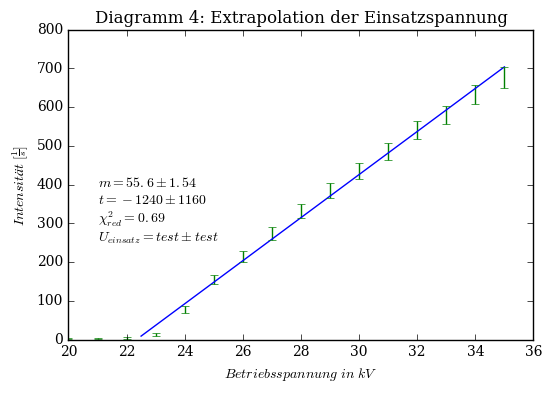

In [19]:
#Aufgabe 1c: Einsatzspannung

#Daten einlesen
U, R = np.loadtxt('tab1.txt', skiprows=1, usecols=(0, 1), unpack=True)
dR=np.sqrt(R)

#Lineare Fitfunktion
def linear(x,t,m):
    return t+m*x

#Fit durchführen
x=np.linspace(22.5,35,100)
popt,pcov=curve_fit(linear,U[4:16],R[4:16],sigma=dR[4:16:1])

print('Fitgerade=t+m*x')
print('t=',popt[0],'±',pcov[0][0])
print('m=',popt[1],'±',pcov[1][1])

#Güte des Fits ermitteln
chisq=np.sum((linear(U[4:16],*popt)-R[4:16])**2/dR[4:16]**2)
dof=11
chisq_red=chisq/dof
print('chisq=',chisq)
print('chisq_red=',chisq_red)
prob=round(1-chi2.cdf(chisq,dof),2)*100
print('Fitwahrscheinlichkeit=',prob,'%')


plt.text(21,250,"$m=55.6\pm1.54$\n$t=-1240\pm1160$\n$\chi_{red}^{2}=0.69$\n$U_{einsatz}=test \pm test$")

plt.plot(x,linear(x,*popt))
plt.errorbar(U,R,dR,linestyle='None')
plt.xlabel('$Betriebsspannung\ in\ kV$') 
plt.ylabel('$Intensität\ [\\frac{1}{s}]$')
plt.title('Diagramm 4: Extrapolation der Einsatzspannung')

plt.savefig('v255_4.pdf',format='pdf')